<a href="https://colab.research.google.com/github/BrianPin/brianpin.github.io/blob/master/2025-06-07-How_to_lean_gradient_based_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- There is such an interest question I encountered during my job interview. The question is about to find a optimal point in a plane that has smallest geometric distance summation to every given data point on the plane


In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

- So here I just randomly emulate the given data point on a 2D plane

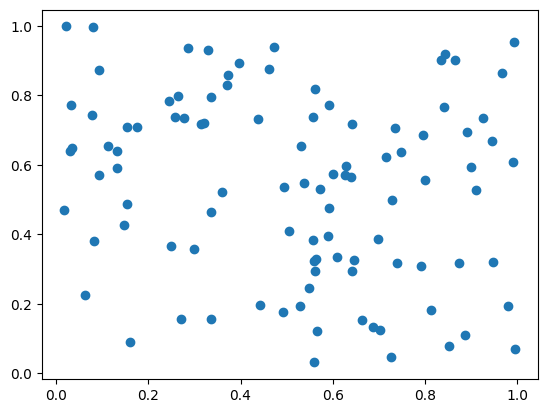

In [2]:
points = np.random.rand(100, 2)
plt.scatter(points[:, 0], points[:, 1])
plt.show()

- Now because I am trying to visualize the work being done by SGD, so I am going to use an PyTorch optimizer to help me update the parameter. Which in my case is the optimal point $ (w_x, w_y) $
- In the below graph I am using a red dot to represent the initialization of the to-be-optimized value

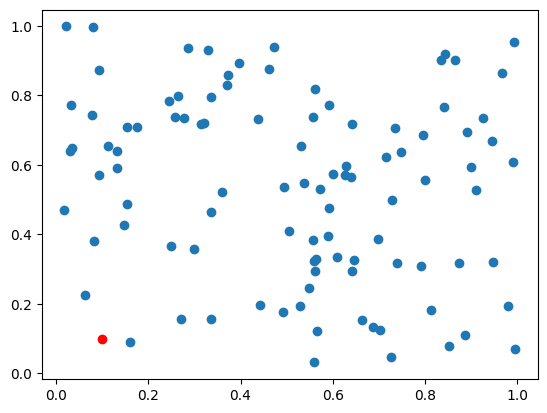

In [3]:
param_w = np.array([[0.1, 0.1]])
plt.scatter(param_w[:, 0], param_w[:, 1], color='r')
plt.scatter(points[:, 0], points[:, 1])
plt.show()

- So we have the loss function as intuitively $ loss = \frac{\sum_n\sqrt{(x_i - w_x)^2 + (y_i-w_y)^2}}{n} $

In [4]:
param_w = np.array([[0.1, 0.1]])
tensor = torch.from_numpy(param_w)
parameters = torch.nn.Parameter(tensor)
optimizer = torch.optim.SGD([parameters], lr=0.05)

In [5]:
updates = [parameters.detach().clone()]
for i in range(100):
    loss = torch.mean(torch.linalg.norm(torch.from_numpy(points) - parameters, dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    updates.append(parameters.detach().clone())

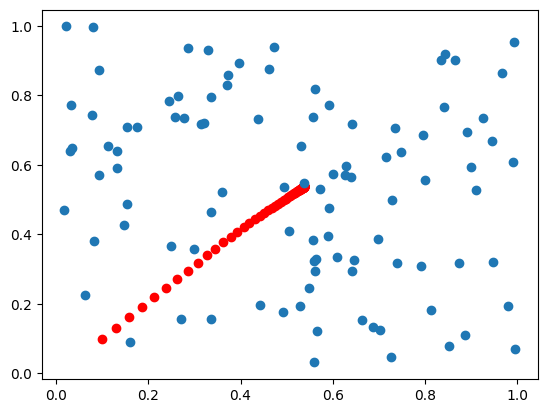

In [7]:
updated = np.array(updates)
updated = np.squeeze(updated, axis=1)
updated.shape
plt.scatter(updated[:, 0], updated[:, 1], color='r')
plt.scatter(points[:, 0], points[:, 1])
plt.show()

- So from the above I verified:
  - You don't need a neural net model to see the SGD work
  - I do utilize torch's optimizer in a "non traditional" way so that I learned a lot from doing it